# Beta Basian Stuff
This notebook is going to try to modify Binary_Fraction Mainly the detection process to do a Bassian aprouch to things

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run BinaryDataClean3.py
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [3]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [4]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)

In [5]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

In [6]:
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)

In [7]:
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

In [8]:
AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_IT)
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_IT)

In [9]:
%run BinaryFraction2.py


In [10]:
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [11]:
#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC2 = thing_LMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],20)
#synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(200,'L',True,False, [0,1],2)
synthetic_rates_SMC2 = thing_SMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],20)

In [12]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC2 = thing_LMC2.Real_Data_Fraction()
real_data_SMC2 = thing_SMC2.Real_Data_Fraction()

In [20]:
synthetic_rates_LMC2[3]

[[0.05575382416237569, 0.05244455640442593],
 [0.3530376565227101, 0.34463440825461783]]

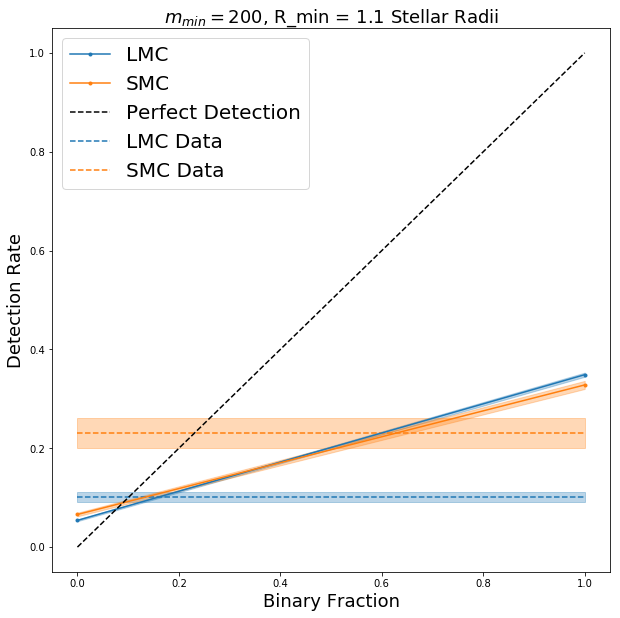

In [21]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC2[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC2[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC2[3][0][1], synthetic_rates_LMC2[3][1][1]],
                 [synthetic_rates_LMC2[3][0][0], synthetic_rates_LMC2[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC2[3][0][0], real_data_LMC2[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC2[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC2[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC2[3][0][1], synthetic_rates_SMC2[3][1][1]],
                 [synthetic_rates_SMC2[3][0][0], synthetic_rates_SMC2[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC2[3][0][0], real_data_SMC2[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, R_min = 1.1 Stellar Radii', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# Baysian Stuff
Trying out the basian method in the Specer papter. 

In [35]:
%run BinaryFraction2.py
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [ ]:
binary_fraction = [1,]
bins = np.arange(0,5,0.5)
beta_dict1 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 100:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict1[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    
binary_fraction = [0,]
bins = np.arange(0,5,0.5)
beta_dict0 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 100:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict0[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

In [38]:
binary_fraction = [1,]
bins = np.arange(0,5,0.5)
beta_dict2 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 200:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(300, ['L', 4.8, 3.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict2[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

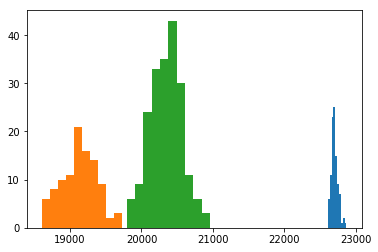

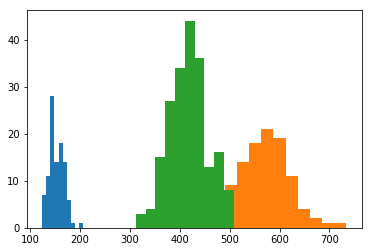

(array([ 9., 22., 35., 42., 42., 39.,  9.,  1.,  0.,  1.]),
 array([103. , 116.8, 130.6, 144.4, 158.2, 172. , 185.8, 199.6, 213.4,
        227.2, 241. ]),
 <a list of 10 Patch objects>)

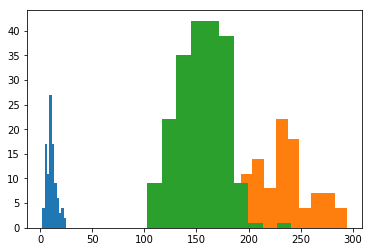

In [40]:
# These Plots where made using the observed error for the std when adding the extra noise in 
# step 4 of the Spencer paper
plt.hist(beta_dict0[0],)
plt.hist(beta_dict1[0])
plt.hist(beta_dict2[0])
plt.show()
plt.hist(beta_dict0[1],)
plt.hist(beta_dict1[1])
plt.hist(beta_dict2[1])
plt.show()
plt.hist(beta_dict0[2],)
plt.hist(beta_dict1[2])
plt.hist(beta_dict2[2])
plt.show()

In [49]:
%run BinaryFraction2.py
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [ ]:
binary_fraction = [1,]
bins = np.arange(0,5,0.25)
beta_dict1 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 10:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict1[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    
binary_fraction = [0,]

beta_dict0 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 10:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict0[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    
binary_fraction = [1,]

beta_dict2 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(300, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict2[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

In [ ]:
# These Plots where made using the total error (observed and jitter) for the std when
# adding the extra noise in step 4 of the Spencer paper
plt.hist(beta_dict0[0],)
plt.hist(beta_dict1[0])
plt.hist(beta_dict2[0])
plt.show()
plt.hist(beta_dict0[1],)
plt.hist(beta_dict1[1])
plt.hist(beta_dict2[1])
plt.show()
plt.hist(beta_dict0[2],)
plt.hist(beta_dict1[2])
plt.hist(beta_dict2[2])
plt.show()

In [ ]:
lmc_beta = thing_LMC2.Real_Data_Beta()
smc_beta = thing_SMC2.Real_Data_Beta()

In [ ]:
lmc_beta = [b if b < 5 else 4.5 for b in lmc_beta]
smc_beta = [b if b < 5 else 4.5 for b in smc_beta]
plt.hist([lmc_beta, smc_beta], bins = bins)

(array([1., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
 <a list of 19 Patch objects>)

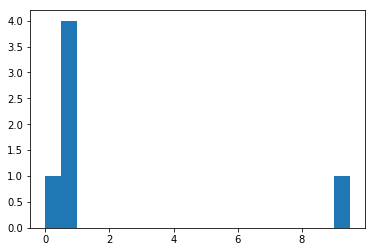

In [38]:
foo = [0.5,0.5,0.5,0.6,0.4,9.5]
plt.hist(foo, bins = bins)